## Домашнее задание

Реализуем алгоритм выделения структурных доменов DOMAK (см. мини-презентацию про этот алгоритм [тут](https://docs.google.com/presentation/d/1Ipcshu_BQUptxExbNkY5TFKh5_x0xcLvbgSRD10FNwk/edit?usp=sharing)).
Контакты между остатками посчитаем с помощью arpeggio - пакета для поиска взаимодействий в структурах белков.

Необходимые импорты и установка arpeggio

In [1]:
import json
import pandas as pd

Arpeggio работает с файлами в формате cif. Это формат, дублирующий данные из формата pdb, но в более удобной для машинного парсинга (и менее удобной для чтения человеком) форме. Используйте данный вам pdbid [отсюда](https://docs.google.com/spreadsheets/d/15uxu7cR19WuGS2t2LrEDd708aE7mGkjH5wwDxMgAacg/edit?usp=sharing).

In [2]:
pdbid = '7DGD'
link = pdbid + '.cif.gz'

In [3]:
!wget http://www.rcsb.org/pdb/files/$link
!gzip -d $link
!ls

--2025-02-17 07:41:41--  http://www.rcsb.org/pdb/files/7DGD.cif.gz
Распознаётся www.rcsb.org (www.rcsb.org)… 128.6.159.248
Подключение к www.rcsb.org (www.rcsb.org)|128.6.159.248|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: https://www.rcsb.org/pdb/files/7DGD.cif.gz [переход]
--2025-02-17 07:41:42--  https://www.rcsb.org/pdb/files/7DGD.cif.gz
Подключение к www.rcsb.org (www.rcsb.org)|128.6.159.248|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 301 Moved Permanently
Адрес: https://files.rcsb.org/download/7DGD.cif.gz [переход]
--2025-02-17 07:41:42--  https://files.rcsb.org/download/7DGD.cif.gz
Распознаётся files.rcsb.org (files.rcsb.org)… 3.164.240.63, 3.164.240.106, 3.164.240.79, ...
Подключение к files.rcsb.org (files.rcsb.org)|3.164.240.63|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 285880 (279K) [application/octet-stream]
Сохранение в: «7DGD.cif.gz»

7DGD.cif.gz 

In [ ]:
!mkdir ./arp-results3

По умолчанию ищутся контакты внутри всей структуры. При обозначении одной цепи как лиганда (в данном случае цепи А, если в структуре всего одна цепь уберите флаг -s) у записей выдачи появляются метки interacting_entities, см выдачу ниже.

In [5]:
!pdbe-arpeggio {pdbid}.cif -ph 7.0 -wh -o ./arp-results3 -s /A//

INFO//07:41:54.269//Program begin.
INFO//07:41:54.269//Selection perceived: ['/A//']
DEBUG//07:41:54.341//Loaded PDB structure (BioPython)
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

DEBUG//07:41:54.646//Loaded MMCIF structure (OpenBabel)
DEBUG//07:41:54.667//Mapped OB to BioPython atoms and vice-versa.
DEBUG//07:41:54.744//Added hydrogens.
DEBUG//07:42:18.029//Wrote hydrogenated structure file. Hydrogenation was by Arpeggio using OpenBabel defaults.
DEBUG//07:42:19.656//Determined atom explicit and implicit valences, bond orders, atomic numbers, formal charge and number of bound hydrogens.
DEBUG//07:42:19.714//Initialised SIFts.
DEBUG//07:42:19.723//Determined polypeptide residues, chain breaks, termini
DEBUG//07:42:19.725//Percieved and stored rings.
DEBUG//07:42:19.727//Perceived and stored amide groups.
DEBUG//07:42:19.735//Added hydrogens to BioPython atoms.
DEBUG//07:42:19.746//Added VdW radii.
DEBUG//07:42:19.75

In [6]:
!ls ./arp-results3

7DGD.json               7DGD_hydrogenated.mmcif


Обратите внимание на типы взаимодействующих объектов (внутри выборки, между выборкой и чем-то ещё и тд)

Выдача в виде json-файла, воспользуемся пакетом json для парсинга и переведём в более человеко-читаемый вид таблицы. Также отфильтруем контакты нужного нам типа между выборкой (цепью А в данном случае) и остальной структурой (INTER)




In [7]:
with open(f'./arp-results3/{pdbid}.json', 'r') as js_file:
  contacts = json.load(js_file)

In [8]:
output_dict = [x for x in contacts if (x['interacting_entities'] == 'INTRA_SELECTION')  ]

In [9]:
df = pd.json_normalize(output_dict)
df.head()

,contact,distance,interacting_entities,type,bgn.auth_asym_id,bgn.auth_atom_id,bgn.auth_seq_id,bgn.label_comp_id,bgn.label_comp_type,bgn.pdbx_PDB_ins_code,end.auth_asym_id,end.auth_atom_id,end.auth_seq_id,end.label_comp_id,end.label_comp_type,end.pdbx_PDB_ins_code
0,[proximal],4.88,INTRA_SELECTION,atom-atom,A,O,695,THR,P,,A,CB,697,LYS,P,
1,[proximal],4.97,INTRA_SELECTION,atom-atom,A,O,695,THR,P,,A,CA,697,LYS,P,
2,[proximal],4.45,INTRA_SELECTION,atom-atom,A,CA,694,CYS,P,,A,O,692,LYS,P,
3,[proximal],4.79,INTRA_SELECTION,atom-atom,A,CA,688,GLY,P,,A,O,692,LYS,P,
4,[proximal],4.33,INTRA_SELECTION,atom-atom,A,CG,696,ARG,P,,A,N,698,PRO,P,


Отфильтруем контакты только белок-белок, а также оставим только по 1 контакту между парой остатков.

In [10]:
df_protein_only = df.loc[(df['bgn.label_comp_type'] == 'P') & (df['end.label_comp_type'] == 'P')]

In [11]:
df_droped = df_protein_only.drop_duplicates(subset=['bgn.auth_seq_id', 'end.auth_seq_id'], keep='first')
df_droped.sort_values(by=['distance'])

,contact,distance,interacting_entities,type,bgn.auth_asym_id,bgn.auth_atom_id,bgn.auth_seq_id,bgn.label_comp_id,bgn.label_comp_type,bgn.pdbx_PDB_ins_code,end.auth_asym_id,end.auth_atom_id,end.auth_seq_id,end.label_comp_id,end.label_comp_type,end.pdbx_PDB_ins_code
16878,"[covalent, polar]",2.03,INTRA_SELECTION,atom-atom,A,SG,378,CYS,P,,A,SG,394,CYS,P,
13874,"[covalent, polar]",2.03,INTRA_SELECTION,atom-atom,A,SG,547,CYS,P,,A,SG,528,CYS,P,
9618,"[covalent, polar]",2.04,INTRA_SELECTION,atom-atom,A,SG,578,CYS,P,,A,SG,565,CYS,P,
14970,"[covalent, polar]",2.04,INTRA_SELECTION,atom-atom,A,SG,67,CYS,P,,A,SG,109,CYS,P,
13849,"[covalent, polar]",2.04,INTRA_SELECTION,atom-atom,A,SG,524,CYS,P,,A,SG,544,CYS,P,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,[proximal],5.00,INTRA_SELECTION,atom-atom,A,C,49,ALA,P,,A,CD2,51,PHE,P,
9401,[proximal],5.00,INTRA_SELECTION,atom-atom,A,N,442,MET,P,,A,CG,431,LEU,P,
4817,[proximal],5.00,INTRA_SELECTION,atom-atom,A,O,192,LEU,P,,A,O,194,ASP,P,
4991,[proximal],5.00,INTRA_SELECTION,atom-atom,A,O,672,TYR,P,,A,N,677,THR,P,


Напишите функцию расчета split_value по номеру остатка.

SplitValue=(intA/extAB)∙(intB/extAB), где intA    – число пар контактирующих остатков из A, intB    – число пар контактирующих остатков из B, extAB – число пар контактирующих остатков, один из A, а другой – из B.




In [12]:
def split_value(split_pos, df):
  df_A = df[df['bgn.auth_seq_id'] < split_pos]
  df_B = df[df['end.auth_seq_id'] > split_pos]
  intA = len(df_A)
  intB = len(df_B)

  extAB = len(df[(df['bgn.auth_seq_id'] < split_pos) &
   (df['end.auth_seq_id'] > split_pos)])

  if extAB == 0:
    return 0

  split_value = (intA / extAB) * (intB / extAB)
  return split_value

Вычислите split_value для каждого остатка в вашем белке. Постройте график split_value в зависимости от номера остатка.

In [13]:
import matplotlib.pyplot as plt

In [37]:
min_res = df_droped['bgn.auth_seq_id'].min()
max_res = df_droped['end.auth_seq_id'].max()
split_data = [split_value(i, df_droped) for i in range(min_res, max_res)]

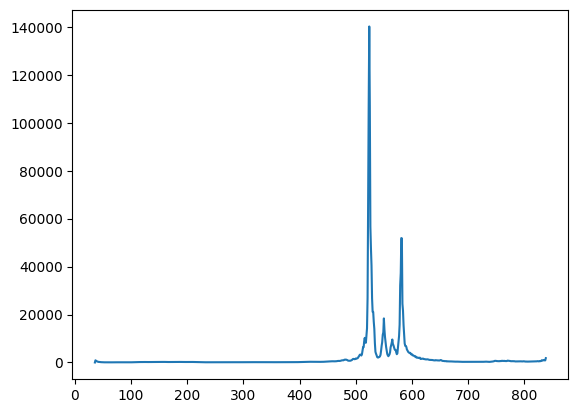

In [38]:
plt.plot(range(min_res, max_res), split_data)

Рассмотрите пики split_value в структуре вашего белка. Сделайте иллюстрацию в PyMOL, показывающую разделение вашей структуры на домены по split_value.


Рассмотрите определенные для вашего белка структурные домены из баз SCOP и CATH, отмеченные на странице в базе данных PDB для данного белка. Определите, совпадают ли границы найденных структурных доменов из SCOP/CATH и вашего разбиения с DOMAK? Приведите иллюстрацию, демонсрирующую совпадение/несовпадение границ доменов на белке.

In [29]:
from scipy.signal import find_peaks

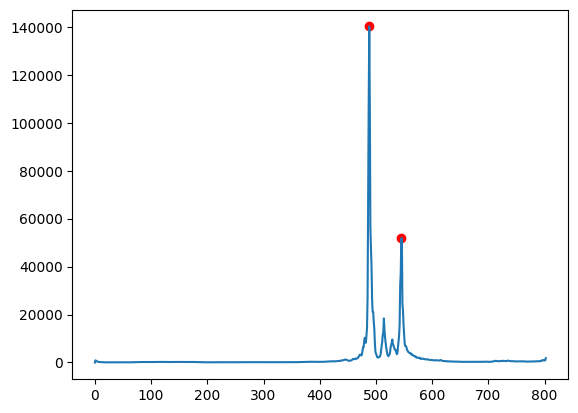

In [40]:
peaks, _ = find_peaks(split_data, height=20000)
plt.plot(range(len(split_data)), split_data)
plt.scatter(peaks, [split_data[i] for i in peaks], color='red')

In [41]:
[split_data[i] for i in peaks]

[140147.8775510204, 51895.53719008265]

In [42]:
peaks

array([488, 545])

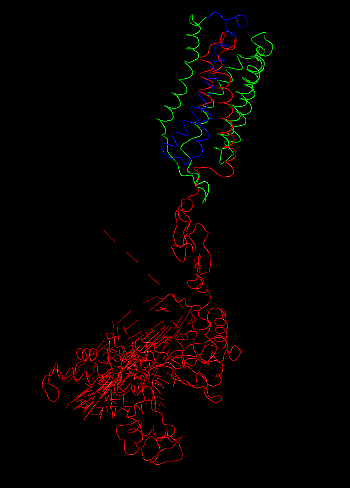

In [43]:
from IPython.display import Image
Image('7DGD.domains.png')

визуально отдаленно похоже на коп, только там два домена выделяют
# Изображение, полученное в PyMol
cmd.select('domain1', 'resi 1-488')
cmd.select('domain2', 'resi 489-545')
cmd.select('domain3', 'resi 546-686')

cmd.color('red', 'domain1')
cmd.color('blue', 'domain2')
cmd.color('green', 'domain3')


cmd.show('cartoon')

cmd.zoom('all')
